In [3]:
# For reading data set
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the csv file in python using the pandas

data_f = pd.read_csv("D:/Chetan/Locker/Data_analysis/ExcelR_datascience/Assignments/4_Simple_LInear_Regression/calories_consumed.csv")

In [63]:
#changing the column names in a data frame

data_f = data_f.rename(columns={'Calories Consumed': 'cc', 'Weight gained (grams)':'wg'})
data_f2 = data_f.drop(data_f.index[3]) #dropped the 3rd row
data_f3 = data_f2.drop(data_f2.index[6]) #dropped the 6th row
data_f

,cc,wg
0,1500,108
1,2300,200
2,3400,900
3,2200,200
4,2500,300
5,1600,110
6,1400,128
7,1900,62
8,2800,600
9,3900,1100


# Exploring Data


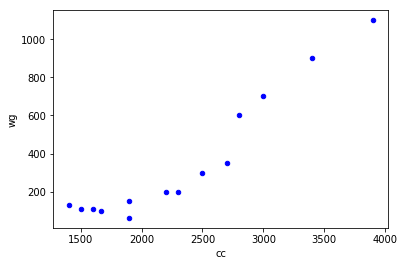

In [4]:
#Visualizing the data using Scatter plot on the imported data

data_f.plot.scatter(x='cc', y='wg', c='Blue')


{'whiskers': [<matplotlib.lines.Line2D at 0x24c5580fc50>,
 'caps': [<matplotlib.lines.Line2D at 0x24c56c6aa20>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c56c63cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x24c56c6ae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c56c71438>],
 'means': []}

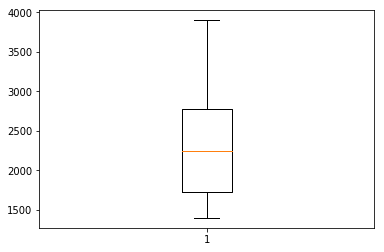

In [89]:
#box plot 
plt.boxplot(data_f.cc)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c557d5400>,
 'caps': [<matplotlib.lines.Line2D at 0x24c56c2c940>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c56c26be0>],
 'medians': [<matplotlib.lines.Line2D at 0x24c56c2cfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c56c34358>],
 'means': []}

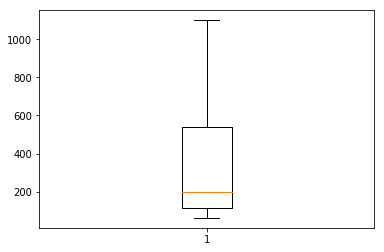

In [88]:
#box plot 
plt.boxplot(data_f.wg)


In [90]:
#sorting data set in ascending order by column 'CC'

data_f.sort_values('cc', ascending=True)

,cc,wg
6,1400,128
0,1500,108
5,1600,110
10,1670,100
7,1900,62
11,1900,150
3,2200,200
1,2300,200
4,2500,300
12,2700,350


In [6]:
# correlation value between X and Y
# Both the variables are strongly correlated as the correlation value is 0.94

data_f.wg.corr(data_f.cc)
np.corrcoef(data_f.cc,data_f.wg)


array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [7]:
# Improting the statsmodel.formula.api for linear regression model

import statsmodels.formula.api as smf
model=smf.ols('wg~cc',data=data_f).fit()

model2=smf.

In [8]:
# For getting coefficients of the varibles used in equation
model.params

Intercept   -625.752356
cc             0.420157
dtype: float64

In [9]:
# P-values for the variables and R-squared value for prepared model
model.summary()

C:\Users\cyadav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           2.86e-07
Time:                        12:17:27   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
cc             0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# 95% confidence interval
model.conf_int(0.05)

,0,1
Intercept,-845.426655,-406.078057
cc,0.330506,0.509807


In [50]:
#shifting the last column in the dataframe to the first place [closed] ealier wg was frst and cc was last column because the wg had 
#some non numberic data was getting error

cols = list(data_f.columns)
cols = [cols[-1]] + cols[:-1]
data_f = data_f[cols]



In [51]:
pred = model.predict(data_f.iloc[:,0])

Text(0, 0.5, 'weight gained')

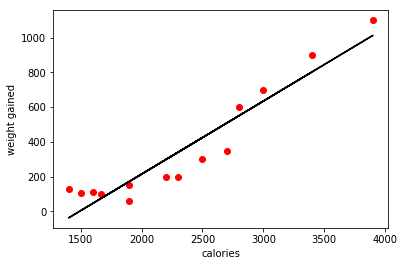

In [60]:
# Visualization of regresion line over the scatter plot of Waist and AT
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt

plt.scatter(x=data_f['cc'],y=data_f['wg'],color='red');plt.plot(data_f['cc'],pred,color='black');plt.xlabel('calories');plt.ylabel('weight gained')

In [54]:
pred.corr(data_f.wg)

0.9469910088554458

In [61]:
pred


0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

In [62]:
data_f

,cc,wg
0,1500,108
1,2300,200
2,3400,900
3,2200,200
4,2500,300
5,1600,110
6,1400,128
7,1900,62
8,2800,600
9,3900,1100
